### Парсер Hooandja
Библиотеки
Этика Парсинга

In [5]:
import time
import requests
from bs4 import BeautifulSoup
import lxml
from multiprocess import Pool
from multiprocess import cpu_count

In [26]:
headers = {"User-Agent": "ittensive-python-scraper/1.0 (+https://www.ittenasive.com)"}
r = requests.get('https://www.hooandja.ee/avasta/edukad',
                 headers=headers)
html = BeautifulSoup(r.content)
#html = BeautifulSoup(r.content, 'lxml')
#t = time.now()
#response_time = time.now() - t
#2-3 rps, Crawl-Delay, response.time*2-3
#time.sleep(round(response_time * 3))
print (html)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html dir="ltr" lang="et" xml:lang="et" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head profile="http://www.w3.org/1999/xhtml/vocab">
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="https://www.hooandja.ee/sites/default/files/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
<meta content="438597739485962" property="fb:app_id"/>
<title>Edukalt lõppenud | Hooandja</title>
<link href="https://www.hooandja.ee/sites/default/files/css/css_xE-rWrJf-fncB6ztZfd2huxqgxu4WO-qwma6Xer30m4.css" media="all" rel="stylesheet" type="text/css"/>
<link href="https://www.hooandja.ee/sites/default/files/css/css_n7aK8s-ciXhQyEYWNOJtISbWxtxQiQvnD-N_xWUtD5A.css" media="all" rel="stylesheet" type="text/css"/>
<link href="https://www.hooandja.ee/sites/default/files/c

### Парсинг сайта *Hooandja* / сборка генератора
Собрать все ссылки на проекты >> Получить данные со всех страниц

In [ ]:
# Получение ссылок на все проекты в фаил hooandja_edukad_projektid.txt
def find_links (links, keyword):
    links_filtered = {}
    for link in links:
        if link.has_attr("href") and link["href"].find(keyword) > -1:
            links_filtered[link["href"]] = 1
    return list(links_filtered.keys())
proj = []
proj.extend(find_links(html.find_all("a"), "/projekt/"))
pages = []
pages.extend(find_links(html.find_all("a"), "/avasta/edukad?page"))

for page in pages:
    r = requests.get("https://www.hooandja.ee" + page)
    html = BeautifulSoup(r.content)
    proj.extend(find_links(html.find_all("a"), "/projekt/"))
with open("hooandja_edukad_projektid.txt", "w") as f:
    f.write("\n".join(proj))

In [130]:
from multiprocess import Pool
from multiprocess import cpu_count

import requests as requests
from bs4 import BeautifulSoup

r = requests.get("https://www.hooandja.ee/projekt/dago-kute", headers=headers)
html = BeautifulSoup(r.content)
print (html)

In [128]:
from multiprocess import Pool
from multiprocess import cpu_count

import requests as requests
from bs4 import BeautifulSoup
r = requests.get("https://www.hooandja.ee/projekt/mari-kalkuni-ounaaia-luhialbum")
html_1 = BeautifulSoup(r.content)
title = html_1.find("div", {"class":"leftside w780"}).get_text()
print (title)

In [121]:
from multiprocess import Pool
from multiprocess import cpu_count

import requests as requests
from bs4 import BeautifulSoup
r = requests.get("https://www.hooandja.ee/projekt/dago-kute")
html = BeautifulSoup(r.content)
title = html.find("div", {"class":"leftside w780"}).get_text()
tags = html.find_all("span", {"class":"h1"})
budget = ""
sales_www = ""
if len(tags) > 0:
    sales_www = tags[0].get_text()
    if len(tags) > 1:
        budget = tags[0].get_text()
        sales_www = tags[1].get_text()
        if len(tags) > 2:
            sales_www = tags[2].get_text()
print (budget)

In [120]:
from multiprocess import Pool
from multiprocess import cpu_count

import requests as requests
from bs4 import BeautifulSoup
r = requests.get("https://www.hooandja.ee/projekt/dago-kute")
html = BeautifulSoup(r.content)
title = html.find("div", {"class":"leftside w780"}).get_text()
tags = html.find_all("span", {"class":"h1"})
budget = ""
sales_www = ""
if len(tags) > 0:
    sales_www = tags[0].get_text()
    if len(tags) > 1:
        budget = tags[0].get_text()
        sales_www = tags[1].get_text()
        if len(tags) > 2:
            sales_www = tags[2].get_text()
print (title)

In [114]:
from multiprocess import Pool
from multiprocess import cpu_count

def get_film (url):
    import requests as requests
    from bs4 import BeautifulSoup
    r = requests.get("https://www.hooandja.ee" + url.strip())
    html = BeautifulSoup(r.content)
    title = html.find("div", {"class":"leftside w780"}).get_text()
    tags = html.find_all("span", {"class":"h1"})
    budget = ""
    sales_www = ""
    if len(tags) > 0:
        sales_www = tags[0].get_text()
        if len(tags) > 1:
            budget = tags[0].get_text()
            sales_www = tags[1].get_text()
            if len(tags) > 2:
                sales_www = tags[2].get_text()
    return [url, title, budget, sales_www]

pool = Pool(cpu_count() * 2)
data = []
with open("hooandja.txt", "w") as f:
    result_iter = pool.map(get_film, f)
    for result in result_iter:
        data.append(result)
print (data)

UnsupportedOperation: not readable

Process ForkPoolWorker-111:
Process ForkPoolWorker-115:
Process ForkPoolWorker-116:
Process ForkPoolWorker-114:
Process ForkPoolWorker-113:
Process ForkPoolWorker-110:
Process ForkPoolWorker-112:
Process ForkPoolWorker-109:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):


In [ ]:
pool = Pool(cpu_count() * 2)
data = []
with open("hooandja_edukad_projektid.txt", "r") as f:
    result_iter = pool.map(get_film, f)
    for result in result_iter:
        data.append(result)


#r = requests.get("https://www.hooandja.ee" + url.strip())
title = html.find("div", {"class":"leftside w780"}).get_text()
tags = html.find("span", {"class":"h1"}).get_text()
tag1 = ""
tag2 = ""


    budget = ""
    sales_www = ""
    if len(tags) > 0:
        sales_www = tags[0].get_text()
        if len(tags) > 1:
            budget = tags[0].get_text()
            sales_www = tags[1].get_text()
            if len(tags) > 2:
                sales_www = tags[2].get_text()
    return [url, title, budget, sales_www]

pool = Pool(cpu_count() * 2)
data = []
with open("hooandja_edukad_projektid.txt", "r") as f:
    result_iter = pool.map(get_film, f)
    for result in result_iter:
        data.append(result)

In [83]:
print (result_iter)

NameError: name 'result_iter' is not defined

In [58]:
#def get_data (url):  

#    r = requests.get("https://www.hooandja.ee" + url.strip())
#    html = BeautifulSoup(r.content)
title = html_d.find("div", {"class":"leftside w780"}).get_text()
#    andj = html.find("span", {"class":"h1"})
    
print (title)
#print (andj)
    
"""
        hooa = tags[0].get_text()
        if len(tags) > 2:
            raha = tags[0].get_text()
            hooa = tags[1].get_text()
            
            if len(tags) > 2:
                andj = tags[2].get_text()
#print(raha)
return [url, title, budget, sales_www]
"""    

"""
def get_film (url):
    import requests as requests
    from bs4 import BeautifulSoup
    r = requests.get("https://www.kinopoisk.ru" + url.strip())
    html = BeautifulSoup(r.content)
    title = html.find("span", {"class":"moviename-title-wrapper"}).get_text()
    tags = html.find_all("td", {"class": "dollar"})
    budget = ""
    sales_www = ""
    if len(tags) > 0:
        sales_www = tags[0].get_text()
        if len(tags) > 1:
            budget = tags[0].get_text()
            sales_www = tags[1].get_text()
            if len(tags) > 2:
                sales_www = tags[2].get_text()
    return [url, title, budget, sales_www]

pool = Pool(cpu_count() * 2)
data = []
with open("films.txt", "r") as f:
    result_iter = pool.map(get_film, f)
    for result in result_iter:
        data.append(result)
print (data)
"""


Dagö "Küte"Kasutaja  Lauri Saatpalu projekt kategoorias Muusika




'\ndef get_film (url):\n    import requests as requests\n    from bs4 import BeautifulSoup\n    r = requests.get("https://www.kinopoisk.ru" + url.strip())\n    html = BeautifulSoup(r.content)\n    title = html.find("span", {"class":"moviename-title-wrapper"}).get_text()\n    tags = html.find_all("td", {"class": "dollar"})\n    budget = ""\n    sales_www = ""\n    if len(tags) > 0:\n        sales_www = tags[0].get_text()\n        if len(tags) > 1:\n            budget = tags[0].get_text()\n            sales_www = tags[1].get_text()\n            if len(tags) > 2:\n                sales_www = tags[2].get_text()\n    return [url, title, budget, sales_www]\n\npool = Pool(cpu_count() * 2)\ndata = []\nwith open("films.txt", "r") as f:\n    result_iter = pool.map(get_film, f)\n    for result in result_iter:\n        data.append(result)\nprint (data)\n'

In [67]:
#links = html.find_all("a")
def find_links (links, keyword):
    links_filtered = {}
    for link in links:
        if link.has_attr("href") and link["href"].find(keyword) > -1 and link["href"].find("/viimati-lisatud/") == -1:
            links_filtered[link["href"]] = 1
    return list(links_filtered.keys())
films = []
films.extend(find_links(html.find_all("a"), "/projekt/"))
pages = []
pages.extend(find_links(html.find_all("a"), "/avasta/"))
print (pages)




"""
def find_links (links, keyword):
    links_filtered = {}
    for link in links:
        if link.has_attr("href") and link["href"].find(keyword) > -1 and link["href"].find("/project/") == -1:
            links_filtered[link["href"]] = 1
    return list(links_filtered.keys())
films = []
films.extend(find_links(html.find_all("a"), "/film/"))
pages = []
pages.extend(find_links(html.find_all("a"), "/page/"))
for page in pages:
    r = requests.get("https://www.kinopoisk.ru" + page)
    html = BeautifulSoup(r.content)
    films.extend(find_links(html.find_all("a"), "/film/"))
with open("films.txt", "w") as f:
    f.write("\n".join(films))
"""



['/avasta/viimati-lisatud', '/avasta/edukad', '/en/avasta/edukad', '/ru/avasta/edukad', 'https://www.hooandja.ee/avasta/kategooriad/trukis', 'https://www.hooandja.ee/avasta/kategooriad/film-foto', 'https://www.hooandja.ee/avasta/kategooriad/muusika', 'https://www.hooandja.ee/avasta/kategooriad/sport', 'https://www.hooandja.ee/avasta/kategooriad/kunst', 'https://www.hooandja.ee/avasta/kategooriad/kodanikualgatus', 'https://www.hooandja.ee/avasta/kategooriad/haridus', 'https://www.hooandja.ee/avasta/kategooriad/looduskaitse', '/avasta/edukad?page=1', '/avasta/edukad?page=2', '/avasta/edukad?page=3', '/avasta/edukad?page=4', '/avasta/edukad?page=5', '/avasta/edukad?page=6', '/avasta/edukad?page=7', '/avasta/edukad?page=8', '/avasta/edukad?page=39', '/avasta/esiletostetud', '/avasta/loppevad', '/avasta/enim-toetatud', '/avasta/kategooriad/disain', '/avasta/kategooriad/kodanikualgatus', '/avasta/kategooriad/film-foto', '/avasta/kategooriad/ev100', '/avasta/kategooriad/Kultuurisaadikud', '/a

'\ndef find_links (links, keyword):\n    links_filtered = {}\n    for link in links:\n        if link.has_attr("href") and link["href"].find(keyword) > -1 and link["href"].find("/project/") == -1:\n            links_filtered[link["href"]] = 1\n    return list(links_filtered.keys())\nfilms = []\nfilms.extend(find_links(html.find_all("a"), "/film/"))\npages = []\npages.extend(find_links(html.find_all("a"), "/page/"))\nfor page in pages:\n    r = requests.get("https://www.kinopoisk.ru" + page)\n    html = BeautifulSoup(r.content)\n    films.extend(find_links(html.find_all("a"), "/film/"))\nwith open("films.txt", "w") as f:\n    f.write("\n".join(films))\n'

In [22]:
# Парсинг Данных # Обход Сайта по страницам # Помощник: правильное извлечение данных
# https://www.hooandja.ee/avasta/edukad?page=1
# Ссылки на страницы с ссылками >> Список ссылок на все страницы >> Данные со страниц
import requests
import pandas as pd
from bs4 import BeautifulSoup
#r = requests.get("https://www.hooandja.ee/avasta/edukad")
html = BeautifulSoup(r.content)
def find_links (links, keyword):
    links_filtered = {}
    for link in links:
        if link.has_attr("href") and link["href"].find(keyword) > -1 
                and link["href"].find("/avasta/edukad") == -1:
            links_filtered[link["href"]] = 1
    return list(links_filtered.keys())
films = []
films.extend(find_links(html.find_all("a"), "/film/"))
pages = []
pages.extend(find_links(html.find_all("a"), "/page/"))
for page in pages:
    r = requests.get("https://www.kinopoisk.ru" + page)
    html = BeautifulSoup(r.content)
    films.extend(find_links(html.find_all("a"), "/film/"))
with open("films.txt", "w") as f:
    f.write("\n".join(films))

# Получение табличных данных
"""
import requests
import pandas as pd
from bs4 import BeautifulSoup
r = requests.get("https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html")
html = BeautifulSoup(r.content)
data = []
table = html.find("table")
for tr in table.find_all("tr"):
    data.append([td.get_text() for td in tr.find_all("td")])
data = pd.DataFrame(data[1:], columns=["Год", "Количество"])
print (data)
"""

# Парсинг Данных
"""
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import pandas as pd
from bs4 import BeautifulSoup
r = requests.get("https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html")
html = BeautifulSoup(r.content)
data = []
table = html.find("table")
for tr in table.find_all("tr"):
    data.append([td.get_text().replace(" ","") for td in tr.find_all("td")])
data = pd.DataFrame(data[1:], columns=["Год", "Количество"])
data["Количество"] = data["Количество"].astype("int")
data["Год"] = data["Год"].str.slice(0,4)
data = data.set_index("Год")
data.plot.line()
plt.show()
"""

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" dir="ltr" lang="et" xml:lang="et" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">\n\n<head profile="http://www.w3.org/1999/xhtml/vocab">\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<link rel="shortcut icon" href="https://www.hooandja.ee/sites/default/files/favicon.ico" type="image/vnd.microsoft.icon" />\n  <meta property="fb:app_id" content="438597739485962"/>\n  <title>Edukalt l\xc3\xb5ppenud | Hooandja</title>\n  <link type="text/css" rel="stylesheet" href="https://www.hooandja.ee/sites/default/files/css/css_xE-rWrJf-fncB6ztZfd2huxqgxu4WO-qwma6Xer30m4.css" media="all" />\n<link type="text/css" rel="stylesheet" href="https://www.hooandja.ee/sites/default/files/css/css_n7aK8s-ciXhQyEYWNOJtISbWxtxQiQvnD-N_xWUtD5A.css" media="all" />\n<link type="text/css" rel

'\n%matplotlib inline\nimport matplotlib.pyplot as plt\nimport requests\nimport pandas as pd\nfrom bs4 import BeautifulSoup\nr = requests.get("https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html")\nhtml = BeautifulSoup(r.content)\ndata = []\ntable = html.find("table")\nfor tr in table.find_all("tr"):\n    data.append([td.get_text().replace(" ","") for td in tr.find_all("td")])\ndata = pd.DataFrame(data[1:], columns=["Год", "Количество"])\ndata["Количество"] = data["Количество"].astype("int")\ndata["Год"] = data["Год"].str.slice(0,4)\ndata = data.set_index("Год")\ndata.plot.line()\nplt.show()\n'

In [23]:
# Мульти процессорность - Получение всех данных сборов с подписчиков

from multiprocess import Pool
from multiprocess import cpu_count

def get_film (url):
    import requests as requests
    from bs4 import BeautifulSoup
    r = requests.get("https://www.kinopoisk.ru" + url.strip())
    html = BeautifulSoup(r.content)
    title = html.find("span", {"class":"moviename-title-wrapper"}).get_text()
    tags = html.find_all("td", {"class": "dollar"})
    budget = ""
    sales_www = ""
    if len(tags) > 0:
        sales_www = tags[0].get_text()
        if len(tags) > 1:
            budget = tags[0].get_text()
            sales_www = tags[1].get_text()
            if len(tags) > 2:
                sales_www = tags[2].get_text()
    return [url, title, budget, sales_www]

pool = Pool(cpu_count() * 2)
data = []
with open("films.txt", "r") as f:
    result_iter = pool.map(get_film, f)
    for result in result_iter:
        data.append(result)
print (data)

[]


(12, 6)


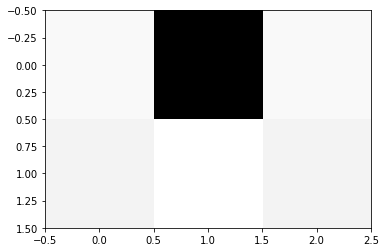

[['30.04.2020'
  'Joel Remmel "Live at Taff Club" vinüülplaadi väljaandmine' 'Muusika'
  1000 1515 57]
 ['01.05.2020' 'Tiutle 2' 'Kat 2' 222 121 232]
 ['02.05.2020' 'Tiutle 3' 'Kat 3' 1000 1515 57]
 ['03.05.2020' 'Tiutle 4' 'Kat 4' 1778 2909 57]
 ['04.05.2020' 'aaa Remmel "Live at Taff Club" vinüülplaadi väljaandmine'
  'Muusika' 222 121 232]
 ['05.05.2020' 'Tiutle 5' 'Kat 5' 1000 1515 57]
 ['06.05.2020' 'Tiutle 6' 'Kat 6' 1778 2909 232]
 ['07.05.2020' 'Tiutle 7' 'Kat 7' 222 121 232]]
144.0
['Лист1', 'Лист2']
    nim  toe 1  kog 1  toe 2  kog 2  toe 1.1  kog 1.1  toe 2.1  kog 2.1
0  Dago     15    393     40    142      NaN      NaN      NaN      NaN
1  Joel      5      4     18     36     35.0      2.0     65.0      4.0
0    Dago
1    Joel
Name: nim, dtype: object
toe 1       10.0
kog 1      198.5
toe 2       29.0
kog 2       89.0
toe 1.1     35.0
kog 1.1      2.0
toe 2.1     65.0
kog 2.1      4.0
dtype: float64


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#инкапсуляция цифт через библеотеку numpy
data = np.loadtxt("http://digo.ee/task04.txt", delimiter=",")
#data = np.loadtxt("http://digo.ee/task04.txt", delimiter=",", skiprows=1, max_rows=1)
#вывод формы файла
print (data.shape)
#Преобразуем данные и сделаем матрицу - квадрат
data = np.reshape(data[0], (2, 3))
plt.imshow(data, cmap='Greys')
plt.show()

#вывод серии данных через pandas
data = pd.read_csv("http://digo.ee/test.csv", na_values="NA", decimal=",")
data.fillna(0, axis=1, inplace=True)
#снятие статистики всех проектов
#print (data.head())
data_array = data.values
print (data_array)
#вывод среднего числа (пользовотелей) по первой категории
#округление среднего числа пользователей
print (data["bak"].mean().round())

#загрузка данных из excel
#анализ подарков и преобразование данных (дата)
data = pd.ExcelFile("http://digo.ee/bake.xlsx")
print (data.sheet_names)
data=data.parse(sheet_name=1, converters={"Date": pd.to_datetime, "DOM time": int})
#переименование колонолк в удобный формат #data=data.parse(sheet_name=1, names=["nimi"], ["num 1"], ["toe 1"], ["num 1"])
print (data.head())
#вызов отдельной колонки
print (data["nim"])
#вызов среднего значения
print (data.mean())

индексы данных                                              Projekt   Toetus
0                                   Lühifilm "Ohver"   1535.0
1  Mari Kalkuni plaadi "Õunaaia album" ja video v...   7338.0
2         Kinkeraamat #õnnelikteekond #becominghappy   2283.0
3         Lexsoul Dancemachine "Lexplosion II" album   6515.0
4  Endise spordiajakirjaniku Valeri Maksimovi elu...   2353.0
5                            Narva Airsoft CQB areen   4185.0
6                           VORONJA SKULPTUURIDE AED   8245.0
7                                      Film "Ankeet"   3067.0
8  Curly Strings ja sõbrad - heategevusliku album...  13389.0
9  "mujal nüüd – elsewhere today" raamatu väljaan...      NaN


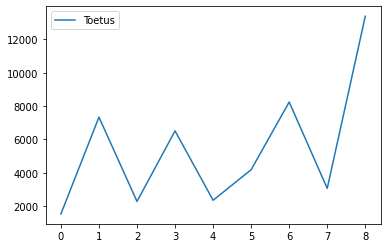

мультииндексы                                                              Toetus
Type    Projekt                                                    
MUU     "mujal nüüd – elsewhere today" raamatu väljaand...      NaN
        Endise spordiajakirjaniku Valeri Maksimovi elul...   2353.0
        Film "Ankeet"                                        3067.0
        Kinkeraamat #õnnelikteekond #becominghappy           2283.0
        Lühifilm "Ohver"                                     1535.0
        Narva Airsoft CQB areen                              4185.0
        VORONJA SKULPTUURIDE AED                             8245.0
MUUSIKA Curly Strings ja sõbrad - heategevusliku albumi...  13389.0
        Lexsoul Dancemachine "Lexplosion II" album           6515.0
        Mari Kalkuni plaadi "Õunaaia album" ja video vä...   7338.0
срезы данных через индексы                                                      Toetus
Projekt                                                    
Curly Strings ja sõbrad

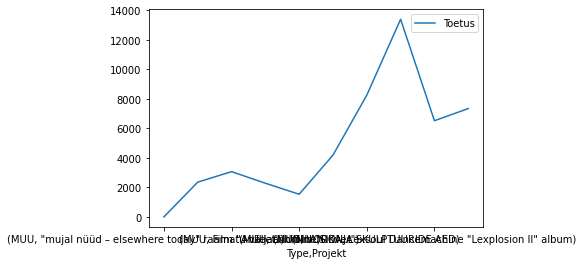

соотношение двух таблиц поиск зависимости одних данных от других Calls
220    13465
Name: UnemployedMen, dtype: int64


In [81]:
# индексы данных
#data = pd.read_csv("http://digo.ee/hooandja.csv", na_values="NA", decimal=".")
#print (data)
data = pd.read_csv("http://digo.ee/hooandja.csv", na_values="NA", decimal=".", skiprows=1, names=["Projekt", "Toetus"])
#data_indexed = pd.Series(data["Toetus"].values, index=data["Projekt"].values)
#print (data_indexed)
#print (data_indexed.index)
#print (data)
#data = data.reset_index()
print ("индексы данных", data)
data.plot.line()
plt.show()

# мультииндексы
area_indexes = data[data["Projekt"].str.contains("album")].index
#создаём генератор
data_areas_index = [(lambda n: "MUUSIKA" if n in area_indexes else "MUU")(i) for i in range(0, len(data.index))]
data["Type"] = data_areas_index
data = data.set_index(["Type", "Projekt"])
data = data.sort_index()
print ("мультииндексы", data)


# срезы данных через индексы
areas = data.loc["MUUSIKA"]
print ("срезы данных через индексы", areas)

# объединение фреймов
data_m = pd.read_csv("http://digo.ee/hooandja.csv", na_values="NA", decimal=".", skiprows=1, names=["Projekt", "Toetus"], index_col="Projekt")
data_n = pd.read_csv("http://digo.ee/hooandja_p.csv", na_values="NA", decimal=".", skiprows=1, names=["Projekt", "Toetus"], index_col="Projekt")
data_a = pd.merge(data_m, data_n, left_index=True, right_index=True)
print ("объединение фреймов", data_a)
data.fillna(0, axis=1, inplace=True)

data.plot.line()
print ("График всех пожертвований")
plt.show()

# объединение данных и сортировка по индексам
# пример из урока

data_1 = pd.read_csv('http://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv', delimiter=';')
data_1 = data_1.set_index(['Year', 'Period'])

data_2 = pd.read_csv('http://video.ittensive.com/python-advanced/data-5283-2019-10-04.utf.csv', delimiter=';')
data_2 = data_2.set_index(['AdmArea', 'Year', 'Month'])
data_2 = data_2.loc['Центральный административный округ']
data_2.index.names = ['Year', 'Period']

data = pd.merge(data_1, data_2, left_index=True, right_index=True)

data = data.reset_index()
data = data.set_index('Calls')
# print(data_1.head())
# print(data_2.head())
data = data.sort_index()
print("соотношение двух таблиц поиск зависимости одних данных от других", data['UnemployedMen'][0:1])

In [150]:
# Фильтрация данных

data = pd.read_csv("http://digo.ee/hooandja.csv", na_values="NA", decimal=".", skiprows=1, names=["Projekt", "Toetus"], index_col="Projekt")
#print (data > 3000)

data_more3k =  data[data["Toetus"] > 3000]
data_more3k_less12k = data[(data["Toetus"] > 3000) & (data["Toetus"] < 12000)]
#print (data_more3k_less12k)

# поиск значений с отсутствующими данными
data_null = data[data["Toetus"].isnull()]
#print (data_null)
data.fillna(0, axis=1, inplace=True)
data_notnull = data.loc[data.any(axis=1)]
#print (data_notnull)

# строки где отсутствуют нулевые значения
data_filled = data.loc[:, data.all()]
#print (data_filled)
data_notnull = data.dropna()
print (data)

# Изменение фреймов
# Операция по отчистке данных
data = pd.read_csv("http://digo.ee/internet-2018.raw.csv", na_values="NA", names=["Projekt", "Toetus", "Lisa"], skiprows=1, index_col="Projekt")
data["Lisa"] = data["Lisa"].apply(lambda n: n/100)

# Создание нового столбца из объединения двух первых
data["2018"] = data["Toetus"] + data["Lisa"]
# избавленуе от промежуточных столбцов
data = data.reset_index() 
data = pd.DataFrame({"Projekt": data["Projekt"], "2018": data["2018"]})
data = data.set_index("Projekt")
#data = data.drop(labels=["Toetus", "Lisa"], axis=1)

data_null = data[data["2018"].isnull()].fillna(0, axis=1)
data_less5 = data[data["2018"] < 5]
print (data.head())
print (data_null)
print (data_less5)
data_null_less5 = data_null.append(data_less5)
print (data_null_less5)

# Лямбда Функции
sum_2 = lambda x = 3, y = 5: x + y
print (sum_2 ())
print (sum_2 (1, 2))

# Чтобы работать со всей строкой данных
def findMoscow (x):
    if x[0].find("Narva") > -1:
        return x[1]*5
    else:
        return x[1]
data_M = pd.read_csv("http://digo.ee/hooandja.csv", na_values = "NA", names=["Регион", "2017"], decimal=",", skiprows=1)
data_M.fillna(0, axis=1, inplace=True)
data_M["2017"] = data_M.apply(findMoscow, axis=1)
print (data_M)

def findMoscow1 (x):
    if x[0].find("Narva") > -1:
        return [x[0], x[1]*5]
    else:
        return x

data = pd.read_csv("http://digo.ee/hooandja.csv", na_values = "NA", names=["Регион", "2017"], decimal=",", skiprows=1)
data.fillna(0, axis=1, inplace=True)
data = data.apply(findMoscow1, axis=1, result_type="expand")
print (data)

#С какого года число удачных проектов меньше 2%

data = pd.read_csv("http://digo.ee/data-9753.utf.csv", delimiter=";")
data["Sum"] = data.apply(lambda x: 100*x[6]/x[7], axis=1)
#print (data)
data = data[data["Sum"] < 2]
data = data.set_index("Year")
data = data.sort_index()
print (data.index[0:1])

data = pd.read_csv('http://digo.ee/data-9753.utf.csv', delimiter=';', na_values='NA', decimal=',') 
data['Percent'] = (data['UnemployedDisabled'] *100) / data['UnemployedTotal'] 
print(data[data['Percent'] <= 2].sort_values('Year').loc[:,'Year'][0:1])

                                                     Toetus
Projekt                                                    
Lühifilm "Ohver"                                     1535.0
Mari Kalkuni plaadi "Õunaaia album" ja video vä...   7338.0
Kinkeraamat #õnnelikteekond #becominghappy           2283.0
Lexsoul Dancemachine "Lexplosion II" album           6515.0
Endise spordiajakirjaniku Valeri Maksimovi elul...   2353.0
Narva Airsoft CQB areen                              4185.0
VORONJA SKULPTUURIDE AED                             8245.0
Film "Ankeet"                                        3067.0
Curly Strings ja sõbrad - heategevusliku albumi...  13389.0
"mujal nüüd – elsewhere today" raamatu väljaand...      0.0
                       2018
Projekt                    
Российская Федерация  16.53
БЕЛГОРОДСКАЯ ОБЛ.     11.35
БРЯНСКАЯ ОБЛ.         12.72
ВЛАДИМИРСКАЯ ОБЛ.     15.24
ВОРОНЕЖСКАЯ  ОБЛ.     17.45
                 2018
Projekt              
РЕСПУБЛИКА КРЫМ   0.0
                 2

In [12]:
#Группировка данных
#Проекты по Геопозиции. Какие города больше всего заработали
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("http://digo.ee/hooandja-data.utf.csv")
data_group = data.groupby("Area")
data_avg = data_group.mean()["Num2"]
print (data_group.first()["Num2"])
data["Area"] = data["Area"].astype("category")
plt.show()

Area
Narva      1202.0
Tallinn    2122.0
Tartu      3122.0
Name: Num2, dtype: float64


In [10]:
import matplotlib.pyplot as plt
data = pd.read_csv("http://digo.ee/hooandja-data.utf.csv")
data["Month"] = data["Month"].str.upper().str.slice(0,3).str.asstypedata.groupby("Area")
data_avg = data_group.mean()["Num2"]
print (data_group.first()["Num2"])
data["Area"] = data["Area"].astype("category")

KeyError: 'Month'

In [13]:
# HTTP запросы к API / SOAP API

import requests
request = requests.get("https://www.cbr-xml-daily.ru/daily_json.js")
import pandas as pd
import json
data = pd.DataFrame(json.loads(request.text)["Valute"])
print (json.loads(request.text)["Valute"]["USD"]["Value"]/json.loads(request.text)["Valute"]["USD"]["Nominal"])

68.6183


In [14]:
import requests
import json
request_headers = {
    "Content-Type": "application/json",
    "Accept": "application/json;charset=UTF-8"
}
url = "https://postprice.ru/engine/russia/api.php"
response = requests.post(url, headers=request_headers, data=json.dumps({"param1": "value1", "param2": "value2"}))
print ("Код ответа:", response.status_code)
response = json.loads(response.text)
print ("Стоимость отправки:", response["simple_letter"], "руб")

Код ответа: 200


KeyError: 'simple_letter'

In [16]:
Работа с SOAP - работает с XML данными
from zeep import Client
client = Client('http://www.dneonline.com/calculator.asmx?WSDL')
result = client.service.Add(2, 3)
print (result)

5
